In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
%matplotlib inline

In [66]:
df = pd.read_csv('NursingData_clean.csv')

In [125]:
df[3000:3010]

,Unnamed: 0,time,Year,Month,TimeofDay,LeftFeed,RightFeed,BotFeed,TotalFeed,BotAmt,Sleep
3000,3000,2015-11-29 19:55:13,2015,11,Evening,NaN,NaN,0,NaN,NaN,0.57
3001,3001,2015-11-29 21:49:10,2015,11,Evening,NaN,NaN,0,NaN,NaN,1.85
3002,3002,2015-11-30 01:56:00,2015,11,Late night,NaN,NaN,0,NaN,NaN,10.00
3003,3003,2015-11-30 16:09:39,2015,11,Afternoon,NaN,NaN,0,NaN,NaN,0.92
3004,3004,2015-11-30 20:25:49,2015,11,Evening,NaN,NaN,0,NaN,NaN,0.75
3005,3005,2015-12-01 01:17:54,2015,12,Late night,NaN,NaN,0,NaN,NaN,11.90
3006,3006,2015-12-01 14:58:08,2015,12,Afternoon,NaN,NaN,0,NaN,NaN,1.33
3007,3007,2015-12-01 18:05:00,2015,12,Afternoon,NaN,NaN,0,NaN,NaN,1.50
3008,3008,2015-12-01 23:29:37,2015,12,Evening,NaN,NaN,0,NaN,NaN,2.00
3009,3009,2015-12-02 02:54:55,2015,12,Late night,NaN,NaN,0,NaN,NaN,10.42


In [68]:
df['time'] = pd.to_datetime(df['time'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3267 entries, 0 to 3266
Data columns (total 11 columns):
Unnamed: 0    3267 non-null int64
time          3267 non-null datetime64[ns]
Year          3267 non-null int64
Month         3267 non-null int64
TimeofDay     3267 non-null object
LeftFeed      2560 non-null float64
RightFeed     2560 non-null float64
BotFeed       3267 non-null float64
TotalFeed     2560 non-null float64
BotAmt        77 non-null float64
Sleep         674 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 306.3+ KB


In [193]:
ts.head()

,Eat,Sleep
2015-11-21 00:00:00,0,0
2015-11-21 00:01:00,0,0
2015-11-21 00:02:00,0,0
2015-11-21 00:03:00,0,0
2015-11-21 00:04:00,0,0


In [209]:
date = '1/21/2016'
parsed = datetime.datetime.strptime(date,'%m/%d/%Y')
jun21 = pd.date_range(date, periods=1440, freq='min')
ts = pd.DataFrame(np.zeros((len(jun21),2)),columns=['Eat','Sleep'],index=jun21)

In [210]:
#for each entry in original dataframe
for row in df.values:
    #select only rows for 12/21/15 for now
    if row[1].year == parsed.year and row[1].month == parsed.month and row[1].day == parsed.day:
        #add amount to timestamp to get interval
        #need to know which number to add, TotalFeed or Sleep 
        #select whether to add to the Sleep or Eat column
        eatsleep = ''
        if row[8] > 0.: 
            print('This is a feeding.')
            eatsleep = 'e'
            intmin = int(row[8])#don't care about seconds
            endtime = row[1] + datetime.timedelta(minutes = intmin)
            print('Start time = ',row[1])
            print('End time = ', endtime)
            
        if row[10] > 0.:  
            print('This is sleep.',row[10])
            #row[10] is H.M, not M.S
            eatsleep = 's'
            inthrs = int(row[10])
            intmin = int((row[10] - inthrs)*60)
            endtime = row[1] + datetime.timedelta(hours = inthrs, minutes = intmin)
            print('Start time = ',row[1])
            print('End time = ', endtime)

        print(eatsleep)   
        #for each row in dummy, is it in the interval?  If yes, add 1 to that row in dummy, in appropriate column
        for i,timebymin in enumerate(ts.index):
            if row[1] < timebymin and timebymin <= endtime:
                if eatsleep == 'e':  
                    ts.Eat[i] = 1
                if eatsleep == 's':
                    ts.Sleep[i] = 1
                #print(ts.ix[i])
        
        
        

This is a feeding.
Start time =  2016-01-21 00:29:41
End time =  2016-01-21 00:43:41
e
This is a feeding.
Start time =  2016-01-21 02:43:37
End time =  2016-01-21 02:50:37
e
This is a feeding.
Start time =  2016-01-21 04:00:00
End time =  2016-01-21 04:24:00
e
This is a feeding.
Start time =  2016-01-21 07:44:03
End time =  2016-01-21 08:04:03
e
This is a feeding.
Start time =  2016-01-21 10:41:15
End time =  2016-01-21 10:56:15
e
This is a feeding.
Start time =  2016-01-21 13:35:30
End time =  2016-01-21 14:05:30
e
This is a feeding.
Start time =  2016-01-21 17:34:59
End time =  2016-01-21 17:43:59
e
This is a feeding.
Start time =  2016-01-21 18:18:36
End time =  2016-01-21 18:31:36
e
This is a feeding.
Start time =  2016-01-21 21:10:00
End time =  2016-01-21 21:15:00
e
This is a feeding.
Start time =  2016-01-21 23:43:13
End time =  2016-01-21 23:58:13
e
This is sleep. 12.5
Start time =  2016-01-21 00:27:28
End time =  2016-01-21 12:57:28
s
This is sleep. 0.87
Start time =  2016-01-

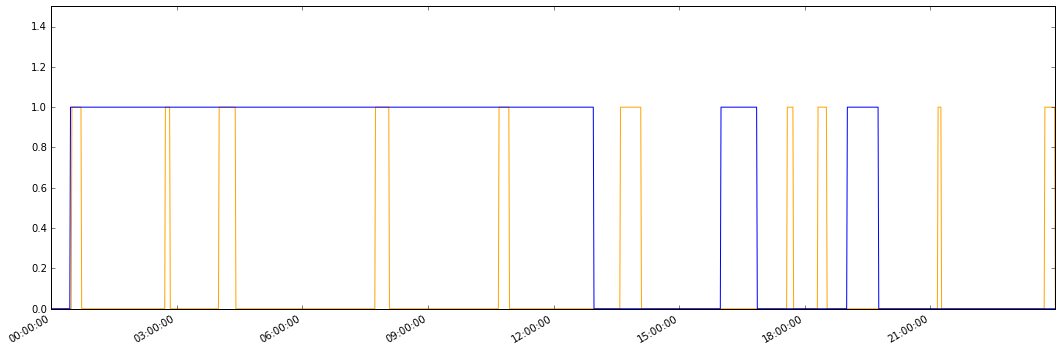

In [211]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
ax.plot(ts.index,ts.Eat,'orange')
ax.plot(ts.index,ts.Sleep,'b')
ax.set_ylim(0,1.5)
ax.set_title
fig.autofmt_xdate()

In [73]:
ts.index.hour

array([ 0,  0,  0, ..., 23, 23, 23], dtype=int32)

In [ ]:
#eventually...
ts.resample('5min',how='sum',closed='left',label='left')